### Importação dos dados



In [101]:
import pandas as pd

url = "https://raw.githubusercontent.com/Nestorcordoba/Challenge_Alura_Store/main/base_de_datos/loja_1.csv"
url2 = "https://raw.githubusercontent.com/Nestorcordoba/Challenge_Alura_Store/main/base_de_datos/loja_2.csv"
url3 = "https://raw.githubusercontent.com/Nestorcordoba/Challenge_Alura_Store/main/base_de_datos/loja_3.csv"
url4 = "https://raw.githubusercontent.com/Nestorcordoba/Challenge_Alura_Store/main/base_de_datos/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)



In [102]:
# uso la funcion 'head()' para visualizar las primeras 5 filas de los Dataframes.

head_loja1 = loja1.head()

head_loja2 = loja2.head()

head_loja3 = loja3.head()

head_loja4 =loja4.head()



In [103]:
#uso la funcion 'info() para visualizar un resumen general de los DataFrames, como por ejemplo:
'''
- Cantidad de filas
- Cantidad de columnas
- Nombre de cada columna
- Tipo de dato de cada columna
- Cantidad de valores no nulos por columna
- Uso de memoria total
'''
info_loja1 =loja1.info()

info_loja2 =loja2.info()

info_loja3 =loja3.info()

info_loja4 =loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [104]:
# uso el metodo 'shape' para saber cuántas filas y columnas tiene los Dataframes

filas_loja1, columnas_loja1 = loja1.shape
print(f"El DataFrame loja1 tiene {filas_loja1} filas y {columnas_loja1} columnas.")

filas_loja2, columnas_loja2 = loja1.shape
print(f"El DataFrame loja2 tiene {filas_loja2} filas y {columnas_loja2} columnas.")

filas_loja3, columnas_loja3 = loja1.shape
print(f"El DataFrame loja3 tiene {filas_loja3} filas y {columnas_loja3} columnas.")

filas_loja4, columnas_loja4 = loja1.shape
print(f"El DataFrame loja4 tiene {filas_loja4} filas y {columnas_loja4} columnas.")



El DataFrame loja1 tiene 2359 filas y 12 columnas.
El DataFrame loja2 tiene 2359 filas y 12 columnas.
El DataFrame loja3 tiene 2359 filas y 12 columnas.
El DataFrame loja4 tiene 2359 filas y 12 columnas.


#1. Análise do faturamento


In [105]:
# suponiendo que el flete lo paga el cliente
## Precio del producto + Flete (costo de envío)
# La columna "loja1['valor_total']"" representa la facturación total por cada venta.
loja1['valor_total'] = loja1['Preço'] + loja1['Frete']


loja2['valor_total'] = loja2['Preço'] + loja2['Frete']


loja3['valor_total'] = loja3['Preço'] + loja3['Frete']


loja4['valor_total'] = loja4['Preço'] + loja4['Frete']


#calculando la facturación total por lojas:
facturacion_total_loja1 = loja1['valor_total']


facturacion_total_loja2 = loja2['valor_total']


facturacion_total_loja3 = loja3['valor_total']


facturacion_total_loja4 = loja4['valor_total']



In [106]:
# Facturacion por producto por lojas:
facturacion_por_producto_loja1 = loja1.groupby('Produto')['valor_total'].sum().sort_values(ascending=False)


facturacion_por_producto_loja2 = loja2.groupby('Produto')['valor_total'].sum().sort_values(ascending=False)


facturacion_por_producto_loja3 = loja3.groupby('Produto')['valor_total'].sum().sort_values(ascending=False)


facturacion_por_producto_loja4 = loja4.groupby('Produto')['valor_total'].sum().sort_values(ascending=False)




In [107]:
# factuiracion mensual(por fecha) convirtiendo la columna de fecha
loja1['Data da Compra'] = pd.to_datetime(loja1['Data da Compra'], dayfirst=True)

loja2['Data da Compra'] = pd.to_datetime(loja2['Data da Compra'], dayfirst=True)

loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'], dayfirst=True)

loja4['Data da Compra'] = pd.to_datetime(loja4['Data da Compra'], dayfirst=True)

In [108]:
# creo una columna llamada mes para agruparla por mes:
loja1['mes'] = loja1['Data da Compra'].dt.to_period('M')
facturacion_mensual_loja1 = loja1.groupby('mes')['valor_total'].sum()

loja2['mes'] = loja2['Data da Compra'].dt.to_period('M')
facturacion_mensual_loja2 = loja2.groupby('mes')['valor_total'].sum()

loja3['mes'] = loja3['Data da Compra'].dt.to_period('M')
facturacion_mensual_loja3 = loja3.groupby('mes')['valor_total'].sum()

loja4['mes'] = loja4['Data da Compra'].dt.to_period('M')
facturacion_mensual_loja4 = loja4.groupby('mes')['valor_total'].sum()



# 2. Vendas por Categoria


In [109]:
# agrupo por 'categoria do Produto'

ventas_por_categoria_loja1 = loja1.groupby('Categoria do Produto')['valor_total'].sum().sort_values(ascending=False)

ventas_por_categoria_loja2 = loja2.groupby('Categoria do Produto')['valor_total'].sum().sort_values(ascending=False)

ventas_por_categoria_loja3 = loja3.groupby('Categoria do Produto')['valor_total'].sum().sort_values(ascending=False)

ventas_por_categoria_loja4 = loja4.groupby('Categoria do Produto')['valor_total'].sum().sort_values(ascending=False)


# 3. Média de Avaliação das Lojas

In [110]:
# uso la funcion 'mean()' para calcular el promedio con pandas porque con el mismo me aseguro de ingnorar los valores NaN
media_loja1 = loja1['Avaliação da compra'].mean()
print(f"El promedio de puntuacion da loja1 es : {media_loja1}")

media_loja2 = loja2['Avaliação da compra'].mean()
print(f"El promedio de puntuacion da loja1 es : {media_loja2}")

media_loja3 = loja3['Avaliação da compra'].mean()
print(f"El promedio de puntuacion da loja1 es : {media_loja3}")

media_loja4 = loja4['Avaliação da compra'].mean()
print(f"El promedio de puntuacion da loja1 es : {media_loja4}")


El promedio de puntuacion da loja1 es : 3.976685036032217
El promedio de puntuacion da loja1 es : 4.037303942348453
El promedio de puntuacion da loja1 es : 4.048325561678677
El promedio de puntuacion da loja1 es : 3.9957591178965224


# 4. Produtos Mais e Menos Vendidos

In [126]:
# productos mas vendidos
'''
1) Contamos cuántas veces aparece cada valor único con la funcion integrada 'value_counts()'
2) Verificamos cual el el producto más vendido con la función integrada 'idxmax()'
3) De los productos contados verificamos cual/les tiene/n el valor máximo con la función integrada 'max()' para saber el numero especifico
4) De los productos contados verificamos cual/les tiene/n el valor mimino con la función integrada 'min()' para saber el numero especifico
'''
cantidad_productos_vendidos_loja1 = loja1['Produto'].value_counts()
nombre_producto_mas_vendido_loja1 = cantidad_productos_vendidos_loja1.idxmax()
valor_maximo_cantidad_vendidos_loja1 = cantidad_productos_vendidos_loja1.max()
nombre_producto_menos_vendido_loja1 = cantidad_productos_vendidos_loja1.idxmin()
valor_minimo_cantidad_vendidos_loja1 = cantidad_productos_vendidos_loja1.min()

cantidad_productos_vendidos_loja2 = loja2['Produto'].value_counts()
nombre_producto_mas_vendido_loja2 = cantidad_productos_vendidos_loja2.idxmax()
valor_maximo_cantidad_vendidos_loja2 = cantidad_productos_vendidos_loja2.max()
nombre_producto_menos_vendido_loja2 = cantidad_productos_vendidos_loja2.idxmin()
valor_minimo_cantidad_vendidos_loja2 = cantidad_productos_vendidos_loja2.min()

cantidad_productos_vendidos_loja3 = loja3['Produto'].value_counts()
nombre_producto_mas_vendido_loja3 = cantidad_productos_vendidos_loja3.idxmax()
valor_maximo_cantidad_vendidos_loja3 = cantidad_productos_vendidos_loja3.max()
nombre_producto_menos_vendido_loja3 = cantidad_productos_vendidos_loja3.idxmin()
valor_minimo_cantidad_vendidos_loja3 = cantidad_productos_vendidos_loja3.min()

cantidad_productos_vendidos_loja4 = loja4['Produto'].value_counts()
nombre_producto_mas_vendido_loja4 = cantidad_productos_vendidos_loja4.idxmax()
valor_maximo_cantidad_vendidos_loja4 = cantidad_productos_vendidos_loja4.max()
nombre_producto_menos_vendido_loja4 = cantidad_productos_vendidos_loja4.idxmin()
valor_minimo_cantidad_vendidos_loja4 = cantidad_productos_vendidos_loja4.min()

print(f"Producto más vendido en loja1: {nombre_producto_mas_vendido_loja1} ({valor_maximo_cantidad_vendidos_loja1} ventas)")
print(f"Producto más vendido en loja2: {nombre_producto_mas_vendido_loja2} ({valor_maximo_cantidad_vendidos_loja2} ventas)")
print(f"Producto más vendido en loja3: {nombre_producto_mas_vendido_loja3} ({valor_maximo_cantidad_vendidos_loja3} ventas)")
print(f"Producto más vendido en loja4: {nombre_producto_mas_vendido_loja4} ({valor_maximo_cantidad_vendidos_loja4} ventas)")

print("------------------------------")

print(f"Producto menos vendido en loja1: {nombre_producto_menos_vendido_loja1} ({valor_minimo_cantidad_vendidos_loja1} ventas)")
print(f"Producto menos vendido en loja2: {nombre_producto_menos_vendido_loja2} ({valor_minimo_cantidad_vendidos_loja2} ventas)")
print(f"Producto menos vendido en loja3: {nombre_producto_menos_vendido_loja3} ({valor_minimo_cantidad_vendidos_loja3} ventas)")
print(f"Producto menos vendido en loja4: {nombre_producto_menos_vendido_loja4} ({valor_minimo_cantidad_vendidos_loja4} ventas)")



Producto más vendido en loja1: Micro-ondas (60 ventas)
Producto más vendido en loja2: Iniciando em programação (65 ventas)
Producto más vendido en loja3: Kit banquetas (57 ventas)
Producto más vendido en loja4: Cama box (62 ventas)
------------------------------
Producto menos vendido en loja1: Headset (33 ventas)
Producto menos vendido en loja2: Jogo de tabuleiro (32 ventas)
Producto menos vendido en loja3: Blocos de montar (35 ventas)
Producto menos vendido en loja4: Guitarra (33 ventas)


# 5. Frete Médio por Loja


In [130]:
# uso la funcion 'mean()' para calcular el promedio con pandas porque con el mismo me aseguro de ingnorar los valores NaN
flete_promedio_loja1 = loja1['Frete'].mean()
print("El promedio de facturacion de felete da loja1 es :", flete_promedio_loja1)

flete_promedio_loja2 = loja2['Frete'].mean()
print("El promedio de facturacion de felete da loja2 es :", flete_promedio_loja2)

flete_promedio_loja3 = loja3['Frete'].mean()
print("El promedio de facturacion de felete da loja3 es :", flete_promedio_loja3)

flete_promedio_loja4 = loja4['Frete'].mean()
print("El promedio de facturacion de felete da loja4 es :", flete_promedio_loja4)


El promedio de facturacion de felete da loja1 es : 34.69180491551149
El promedio de facturacion de felete da loja2 es : 33.62194065817927
El promedio de facturacion de felete da loja3 es : 33.07446427411743
El promedio de facturacion de felete da loja4 es : 31.278997081841727


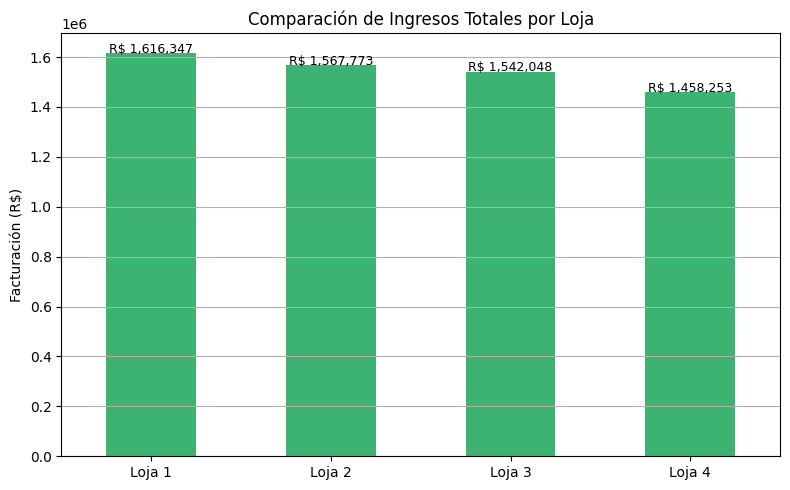

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una serie con la facturación total por loja
facturacion_total = pd.Series({
    'Loja 1': loja1['valor_total'].sum(),
    'Loja 2': loja2['valor_total'].sum(),
    'Loja 3': loja3['valor_total'].sum(),
    'Loja 4': loja4['valor_total'].sum()
})

# Gráfico de barras
plt.figure(figsize=(8, 5))
facturacion_total.plot(kind='bar', color='mediumseagreen')
plt.title('Comparación de Ingresos Totales por Loja')
plt.ylabel('Facturación (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Agregar los valores encima de cada barra
for i, valor in enumerate(facturacion_total):
    plt.text(i, valor + 1000, f'R$ {valor:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


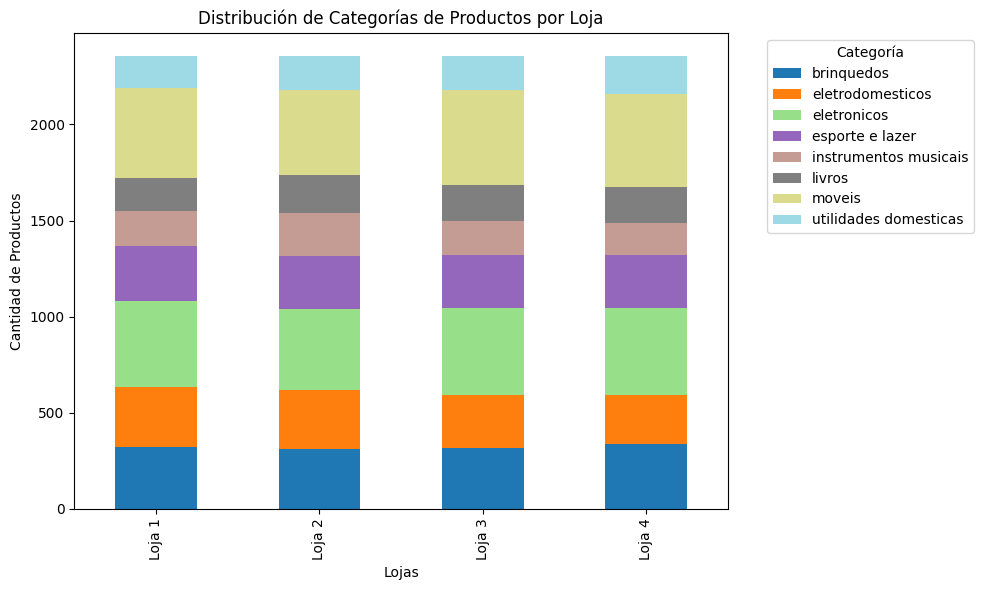

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar categorías por loja
categorias_loja1 = loja1['Categoria do Produto'].value_counts()
categorias_loja2 = loja2['Categoria do Produto'].value_counts()
categorias_loja3 = loja3['Categoria do Produto'].value_counts()
categorias_loja4 = loja4['Categoria do Produto'].value_counts()

# Combinar en un DataFrame
df_categorias = pd.DataFrame({
    'Loja 1': categorias_loja1,
    'Loja 2': categorias_loja2,
    'Loja 3': categorias_loja3,
    'Loja 4': categorias_loja4
}).fillna(0)

# Transponer para graficar categorías apiladas por loja
df_categorias = df_categorias.T

# Gráfico apilado
df_categorias.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Distribución de Categorías de Productos por Loja')
plt.ylabel('Cantidad de Productos')
plt.xlabel('Lojas')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-139-027916a77730>:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos, labels=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])


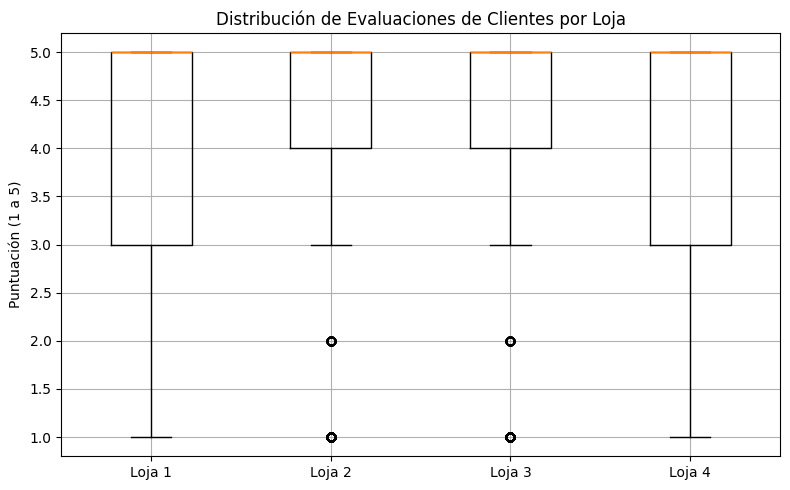

In [139]:
import matplotlib.pyplot as plt

# Agrupar datos en lista para boxplot
datos = [
    loja1['Avaliação da compra'],
    loja2['Avaliação da compra'],
    loja3['Avaliação da compra'],
    loja4['Avaliação da compra']
]

# Gráfico de cajas
plt.figure(figsize=(8, 5))
plt.boxplot(datos, labels=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])
plt.title('Distribución de Evaluaciones de Clientes por Loja')
plt.ylabel('Puntuación (1 a 5)')
plt.grid(True)
plt.tight_layout()
plt.show()


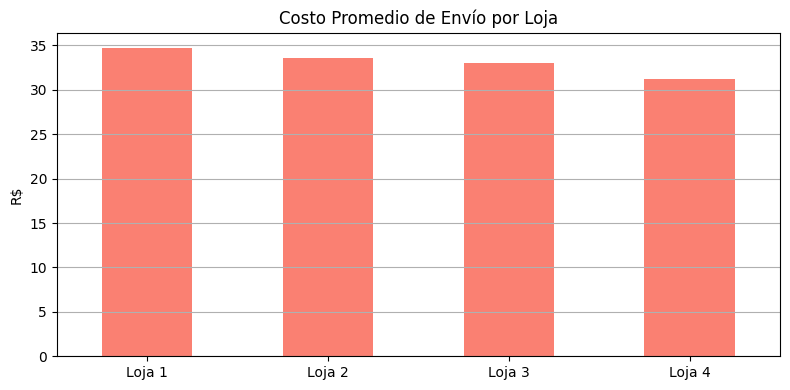

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

flete_promedio = pd.Series({
    'Loja 1': loja1['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
})

plt.figure(figsize=(8, 4))
flete_promedio.plot(kind='bar', color='salmon')
plt.title('Costo Promedio de Envío por Loja')
plt.ylabel('R$')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


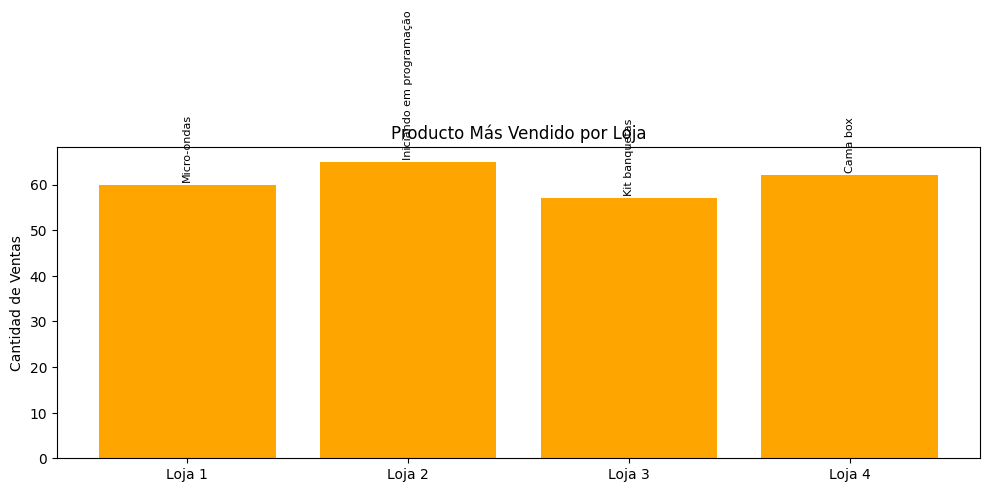

In [140]:
import matplotlib.pyplot as plt

productos_mas_vendidos = [
    nombre_producto_mas_vendido_loja1,
    nombre_producto_mas_vendido_loja2,
    nombre_producto_mas_vendido_loja3,
    nombre_producto_mas_vendido_loja4
]

ventas = [
    valor_maximo_cantidad_vendidos_loja1,
    valor_maximo_cantidad_vendidos_loja2,
    valor_maximo_cantidad_vendidos_loja3,
    valor_maximo_cantidad_vendidos_loja4
]

plt.figure(figsize=(10, 5))
plt.bar(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], ventas, color='orange')
plt.title('Producto Más Vendido por Loja')
plt.ylabel('Cantidad de Ventas')
for i, txt in enumerate(productos_mas_vendidos):
    plt.text(i, ventas[i] + 1, txt, ha='center', fontsize=8, rotation=90)
plt.tight_layout()
plt.show()


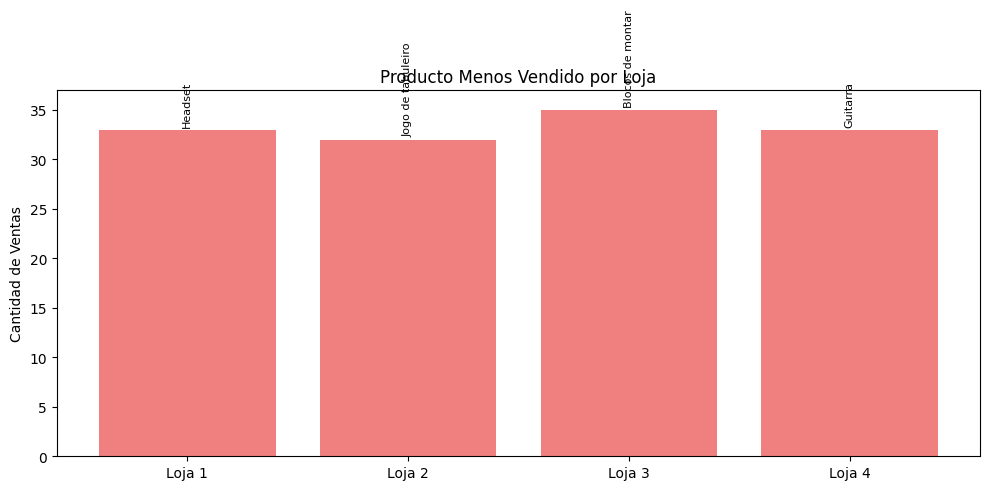

In [141]:
import matplotlib.pyplot as plt

# Nombres y cantidades del producto menos vendido por loja
productos_menos_vendidos = [
    nombre_producto_menos_vendido_loja1,
    nombre_producto_menos_vendido_loja2,
    nombre_producto_menos_vendido_loja3,
    nombre_producto_menos_vendido_loja4
]

ventas_minimas = [
    valor_minimo_cantidad_vendidos_loja1,
    valor_minimo_cantidad_vendidos_loja2,
    valor_minimo_cantidad_vendidos_loja3,
    valor_minimo_cantidad_vendidos_loja4
]

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], ventas_minimas, color='lightcoral')
plt.title('Producto Menos Vendido por Loja')
plt.ylabel('Cantidad de Ventas')
plt.ylim(0, max(ventas_minimas) + 2)

# Agregar etiquetas con el nombre del producto
for i, txt in enumerate(productos_menos_vendidos):
    plt.text(i, ventas_minimas[i] + 0.5, txt, ha='center', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


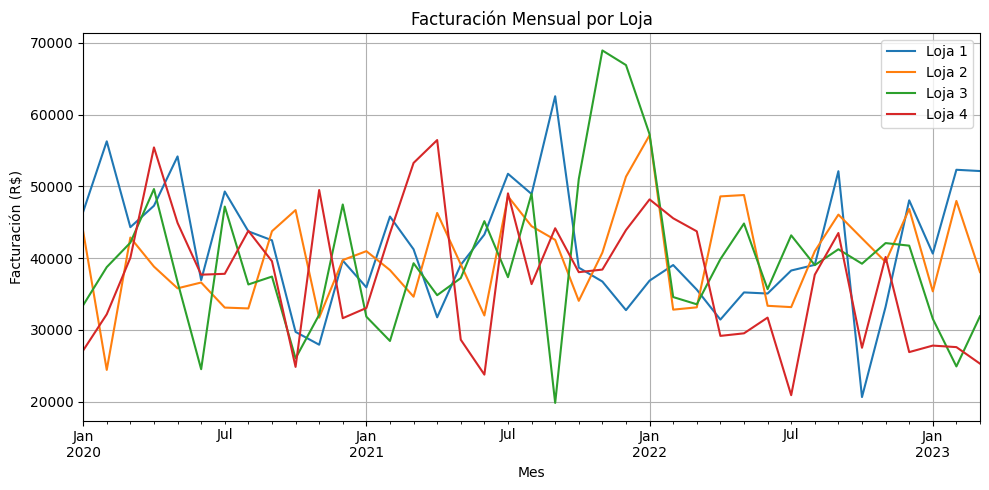

In [134]:
# eavaluacion mensual de la facturacion por tienda
# Asegurar que 'mes' esté generado
for loja in [loja1, loja2, loja3, loja4]:
    loja['mes'] = loja['Data da Compra'].dt.to_period('M')

# Agrupación mensual
fact_mensual1 = loja1.groupby('mes')['valor_total'].sum()
fact_mensual2 = loja2.groupby('mes')['valor_total'].sum()
fact_mensual3 = loja3.groupby('mes')['valor_total'].sum()
fact_mensual4 = loja4.groupby('mes')['valor_total'].sum()

# Gráfico
plt.figure(figsize=(10, 5))
fact_mensual1.plot(label='Loja 1')
fact_mensual2.plot(label='Loja 2')
fact_mensual3.plot(label='Loja 3')
fact_mensual4.plot(label='Loja 4')
plt.legend()
plt.title('Facturación Mensual por Loja')
plt.ylabel('Facturación (R$)')
plt.xlabel('Mes')
plt.grid(True)
plt.tight_layout()
plt.show()


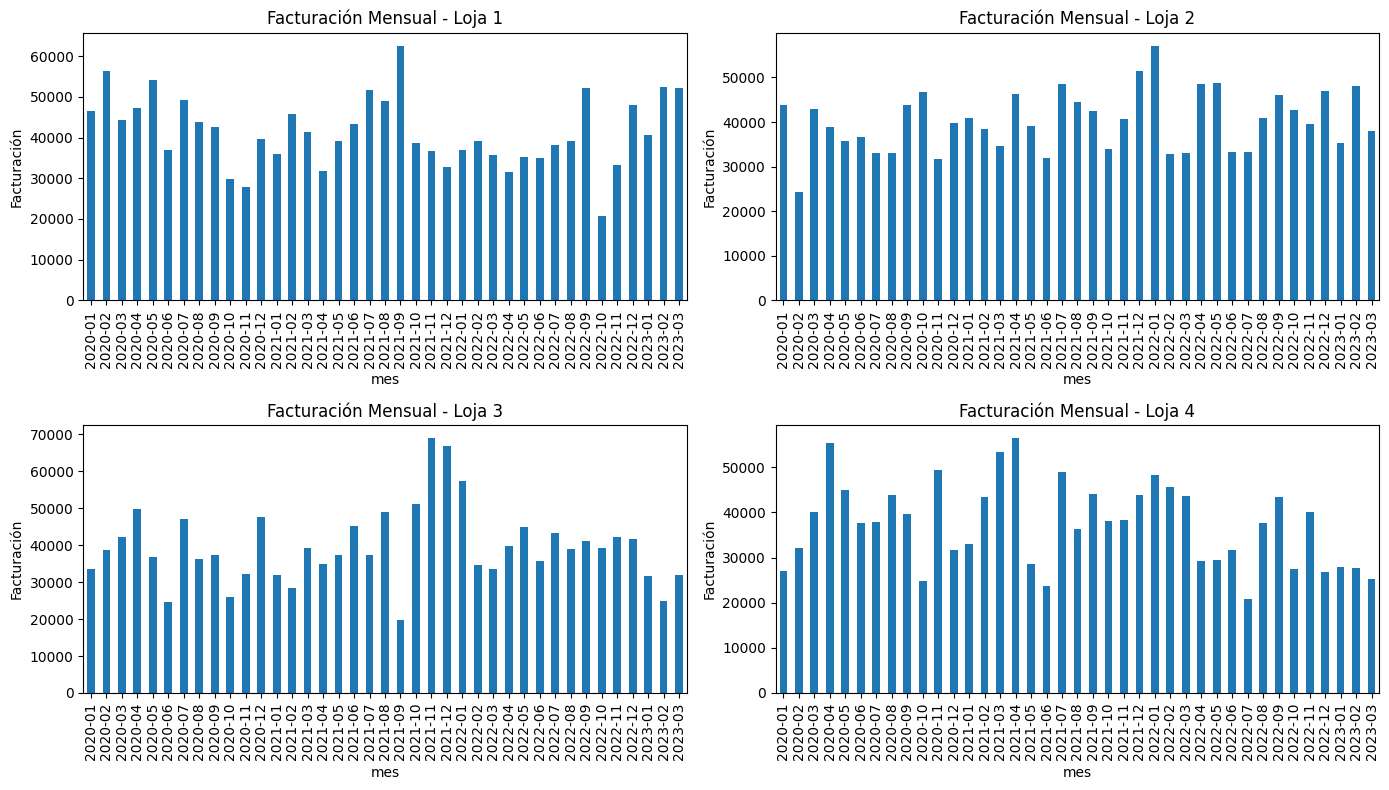

In [114]:
# grafico para visualizar la facturación mensual de cada loja

import matplotlib.pyplot as plt

# Creo figura con 4 subplots (uno por loja)
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Loja 1
facturacion_mensual_loja1.plot(kind='bar', ax=axs[0, 0], title='Facturación Mensual - Loja 1')
axs[0, 0].set_ylabel('Facturación')

# Loja 2
facturacion_mensual_loja2.plot(kind='bar', ax=axs[0, 1], title='Facturación Mensual - Loja 2')
axs[0, 1].set_ylabel('Facturación')

# Loja 3
facturacion_mensual_loja3.plot(kind='bar', ax=axs[1, 0], title='Facturación Mensual - Loja 3')
axs[1, 0].set_ylabel('Facturación')

# Loja 4
facturacion_mensual_loja4.plot(kind='bar', ax=axs[1, 1], title='Facturación Mensual - Loja 4')
axs[1, 1].set_ylabel('Facturación')

plt.tight_layout()
plt.show()


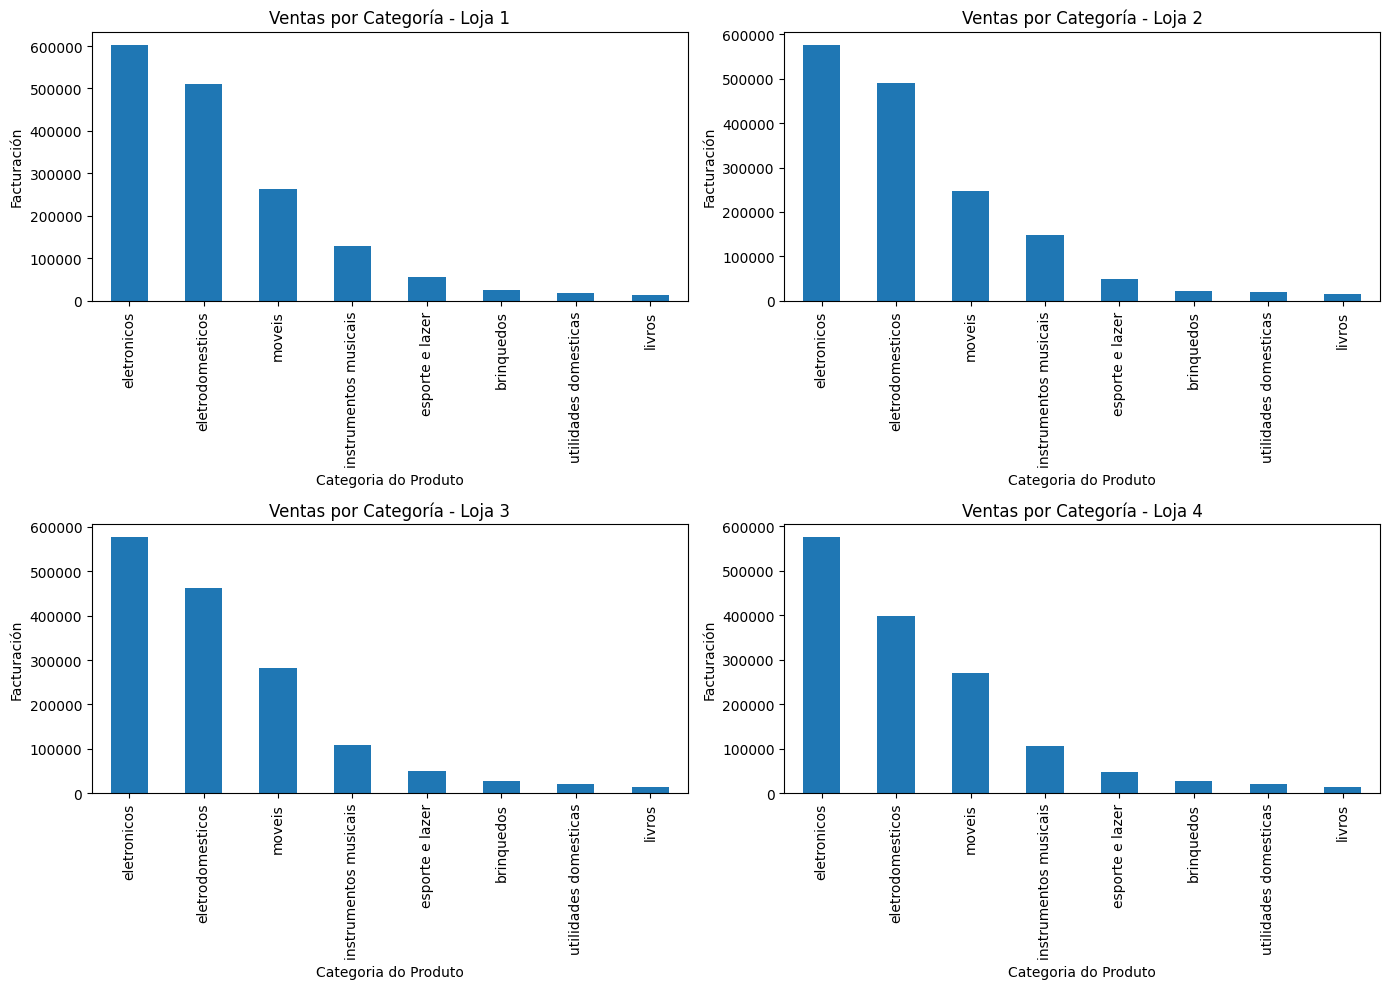

In [115]:
# grafico para visualizar facturación total por categoría de producto en cada loja
import matplotlib.pyplot as plt

# Crear figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loja 1
ventas_por_categoria_loja1.plot(kind='bar', ax=axs[0, 0], title='Ventas por Categoría - Loja 1')
axs[0, 0].set_ylabel('Facturación')

# Loja 2
ventas_por_categoria_loja2.plot(kind='bar', ax=axs[0, 1], title='Ventas por Categoría - Loja 2')
axs[0, 1].set_ylabel('Facturación')

# Loja 3
ventas_por_categoria_loja3.plot(kind='bar', ax=axs[1, 0], title='Ventas por Categoría - Loja 3')
axs[1, 0].set_ylabel('Facturación')

# Loja 4
ventas_por_categoria_loja4.plot(kind='bar', ax=axs[1, 1], title='Ventas por Categoría - Loja 4')
axs[1, 1].set_ylabel('Facturación')

# Ajustar diseño
plt.tight_layout()
plt.show()


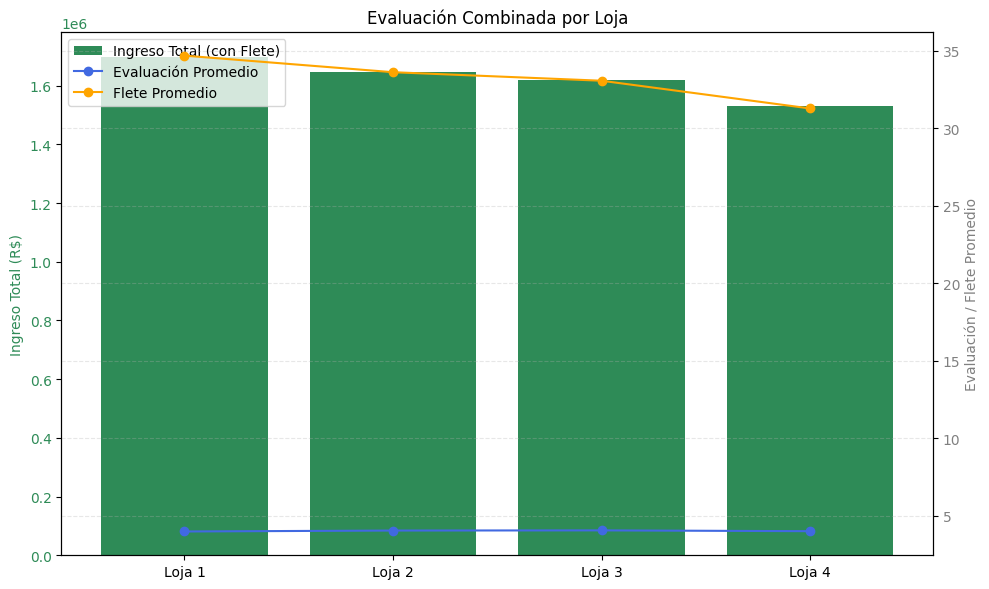

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos base
ventas = {
    'Loja 1': {'valor_total': 1616347, 'ventas': 2359, 'evaluacion': 3.9767, 'flete_prom': 34.69},
    'Loja 2': {'valor_total': 1567773, 'ventas': 2359, 'evaluacion': 4.0373, 'flete_prom': 33.62},
    'Loja 3': {'valor_total': 1542048, 'ventas': 2359, 'evaluacion': 4.0483, 'flete_prom': 33.07},
    'Loja 4': {'valor_total': 1458253, 'ventas': 2358, 'evaluacion': 3.9958, 'flete_prom': 31.28}
}

# Evaluación combinada con ingreso total = valor_total + (ventas × flete_prom)
evaluacion_df = pd.DataFrame.from_dict(ventas, orient='index')
evaluacion_df['ingreso_total'] = evaluacion_df['valor_total'] + (evaluacion_df['ventas'] * evaluacion_df['flete_prom'])

# Crear gráfico de barras agrupadas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico 1: Ingreso total
ax1.bar(evaluacion_df.index, evaluacion_df['ingreso_total'], color='seagreen', label='Ingreso Total (con Flete)')
ax1.set_ylabel('Ingreso Total (R$)', color='seagreen')
ax1.tick_params(axis='y', labelcolor='seagreen')
ax1.set_title('Evaluación Combinada por Loja')

# Crear un segundo eje Y para evaluaciones y fletes
ax2 = ax1.twinx()
ax2.plot(evaluacion_df.index, evaluacion_df['evaluacion'], label='Evaluación Promedio', color='royalblue', marker='o')
ax2.plot(evaluacion_df.index, evaluacion_df['flete_prom'], label='Flete Promedio', color='orange', marker='o')
ax2.set_ylabel('Evaluación / Flete Promedio', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Agregar leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()


In [144]:
# Evaluación combinada para analizar cual tienda debe ser cerrada
evaluacion = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Facturación Total': [
        loja1['valor_total'].sum(),
        loja2['valor_total'].sum(),
        loja3['valor_total'].sum(),
        loja4['valor_total'].sum()
    ],
    'Ventas Totales': [
        loja1['Produto'].count(),
        loja2['Produto'].count(),
        loja3['Produto'].count(),
        loja4['Produto'].count()
    ],
    'Evaluación Promedio': [
        loja1['Avaliação da compra'].mean(),
        loja2['Avaliação da compra'].mean(),
        loja3['Avaliação da compra'].mean(),
        loja4['Avaliação da compra'].mean()
    ],
    'Flete Promedio': [
        loja1['Frete'].mean(),
        loja2['Frete'].mean(),
        loja3['Frete'].mean(),
        loja4['Frete'].mean()
    ]
})

# Ordenar para ver cuál rinde peor
evaluacion.sort_values(by=['Facturación Total', 'Ventas Totales', 'Evaluación Promedio'], ascending=[True, True, True])


,Loja,Facturación Total,Ventas Totales,Evaluación Promedio,Flete Promedio
3,Loja 4,1.458253e+06,2358,3.995759,31.278997
2,Loja 3,1.542048e+06,2359,4.048326,33.074464
1,Loja 2,1.567773e+06,2359,4.037304,33.621941
0,Loja 1,1.616347e+06,2359,3.976685,34.691805


1. Ingreso total (valor + flete)

- Loja 1 es la lider.
- Loja 4 tiene el ingreso más bajo, incluso sumando el flete.

2. Evaluación promedio de clientes

- Loja 3 tiene la mejor evaluación.
- Loja 4 tiene un puntaje aceptable, pero no sobresale.
- Loja 1 tiene la menor evaluación (debajo de 4.0).

3. Tendencia de ingresos mensuales
- Loja 1 y 2 presentan curvas ascendentes y dinámicas.
- Loja 3 es estable pero plana.
- Loja 4 tiene curva baja y sin picos destacados.
- Evaluación final con flete incluido como ingreso

Loja	Puntos Fuertes
----  -------------
Loja1 --> Mayor ingreso total (valor + flete).
Loja2 --> Buen ingreso, buena evaluación.
Loja3 --> Buena evaluación, ingreso aceptable.
Loja4 --> Costo de envío más bajo.

Loja  Puntos Débiles
----  -------------
Loja1 --> Peor evaluación de clientes.
Loja2 --> Envío más costoso que Loja 4.
Loja3 --> Crecimiento mensual bajo.
Loja4 --> Menor ingreso total, menor crecimiento, menos ventas.


Conclusión: La tienda que debe ser vendida es la: Loja 4.